In [3]:
import numpy as np 
import pandas as pd 
import pingouin
import matplotlib.pyplot as plt

In [8]:
dfe = pd.read_csv('r490.csv')
dfe = dfe[dfe['r1_charge_heater'] > 0]


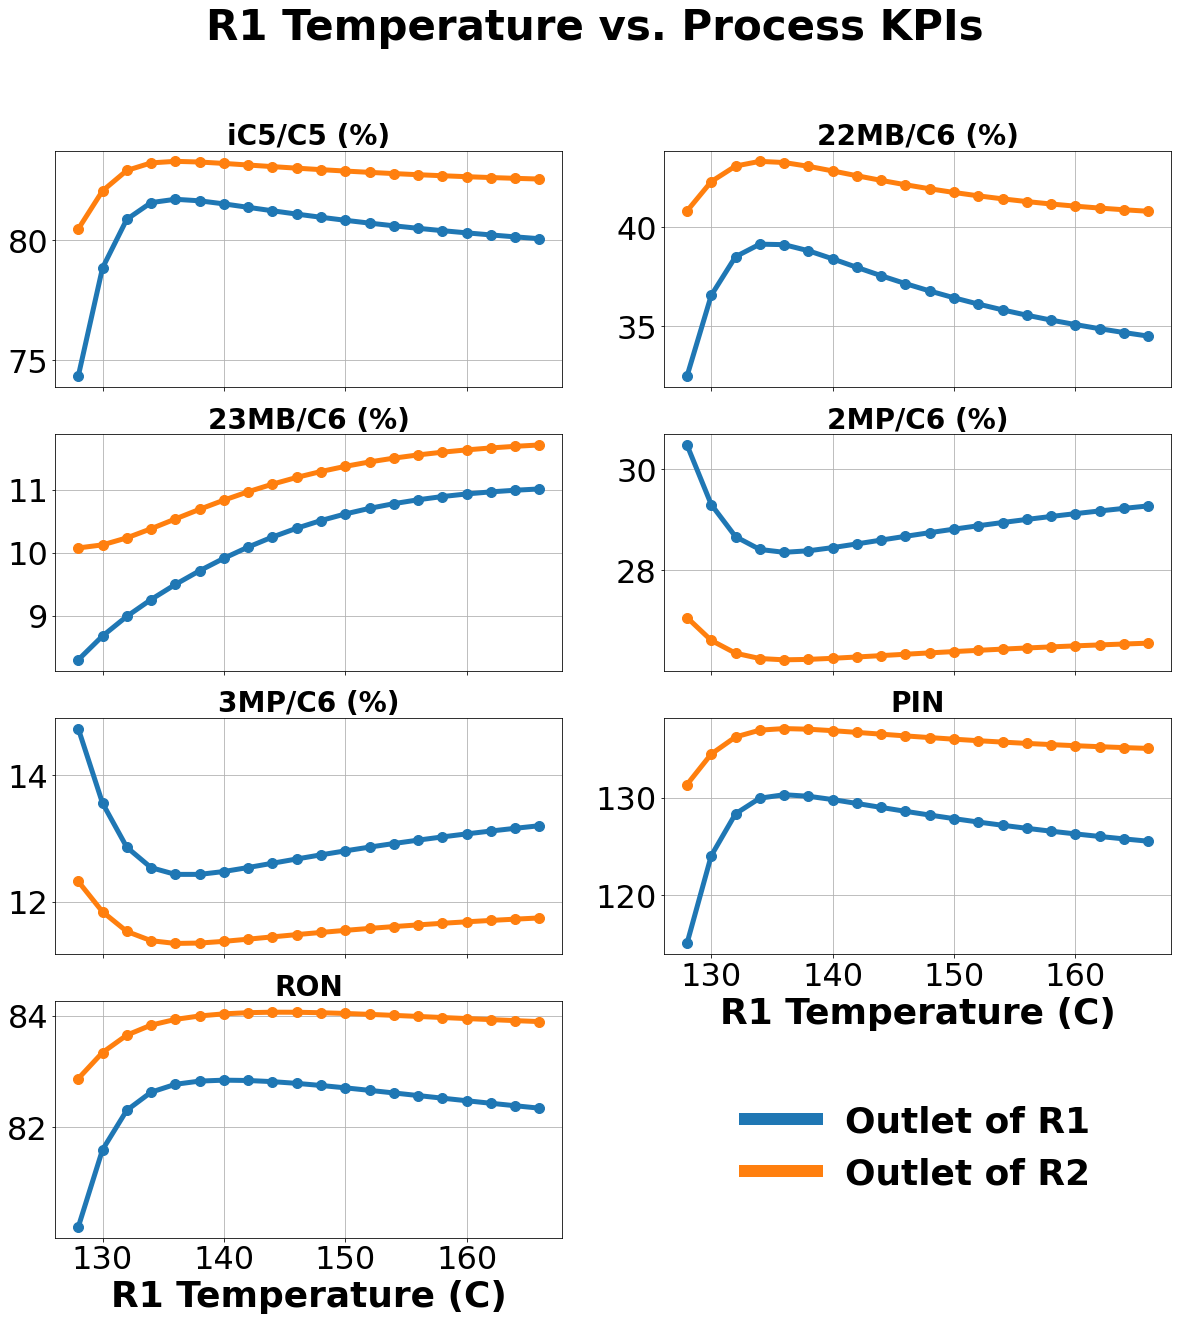

In [12]:
R2_TEMPERATURE = 134
R1_PRESSURE = 50
R2_PRESSURE = 50

sweep_col = 'r1_temp'
sweep_col_title = 'R1 Temperature (C)'
ix = (dfe['r2_temp'] == R2_TEMPERATURE) & (dfe['r1_pressure'] == R1_PRESSURE) & (dfe['r2_pressure'] == R2_PRESSURE)
sdf = dfe[ix].copy()
sdf.sort_values([sweep_col], inplace=True)

cols_to_plot = [
    ("iso_ratio_c5", "iC5/C5 (%)"),
    ("iso_ratio_c6_22mb", "22MB/C6 (%)"),
    ("iso_ratio_c6_23mb", "23MB/C6 (%)"),
    ("iso_ratio_c6_2mp", "2MP/C6 (%)"),
    ("iso_ratio_c6_3mp", "3MP/C6 (%)"),
    ("pin", "PIN"),
    ("ron", "RON")
]
n = len(cols_to_plot)

f, axes = plt.subplots(int(np.ceil(n / 2)), 2, figsize=(20, 20))
axes = axes.flatten()
for i, r in enumerate(zip(cols_to_plot, axes)):
    col_to_plot, ax = r
    col, title = col_to_plot
    ax.plot(sdf[sweep_col], sdf['r1_%s' % col], linewidth=5, marker='o', markersize=10, label='Outlet of R1')
    ax.plot(sdf[sweep_col], sdf['r2_%s' % col], linewidth=5, marker='o', markersize=10, label='Outlet of R2')
    ax.tick_params(axis='x', labelsize=32)
    ax.tick_params(axis='y', labelsize=32)
    
    if i >= 5:
        ax.set_xlabel(sweep_col_title, fontsize=36, fontweight='bold')
    else:
        ax.set_xticklabels([])
    
    if i == 5:
        # Put a legend below current axis
        legend = ax.legend(loc='upper center', 
                  frameon=False,
                  bbox_to_anchor=(0.5, -.5),
                  fancybox=False, 
                  shadow=False,
                  ncol=1,
                  prop={'weight':'bold', 'size':36})
        for line in legend.get_lines():
            line.set_linewidth(12.0)
    ax.set_title(title, fontsize=28, fontweight='bold')
    ax.grid(True)
axes[-1].axis('off')
plt.suptitle('R1 Temperature vs. Process KPIs', fontsize=42, fontweight='bold')
plt.savefig("tmp/fig2.tiff", 
            bbox_inches='tight', 
            transparent=True, 
            pad_inches=0, dpi=300, 
            pil_kwargs={"compression": "tiff_lzw"})

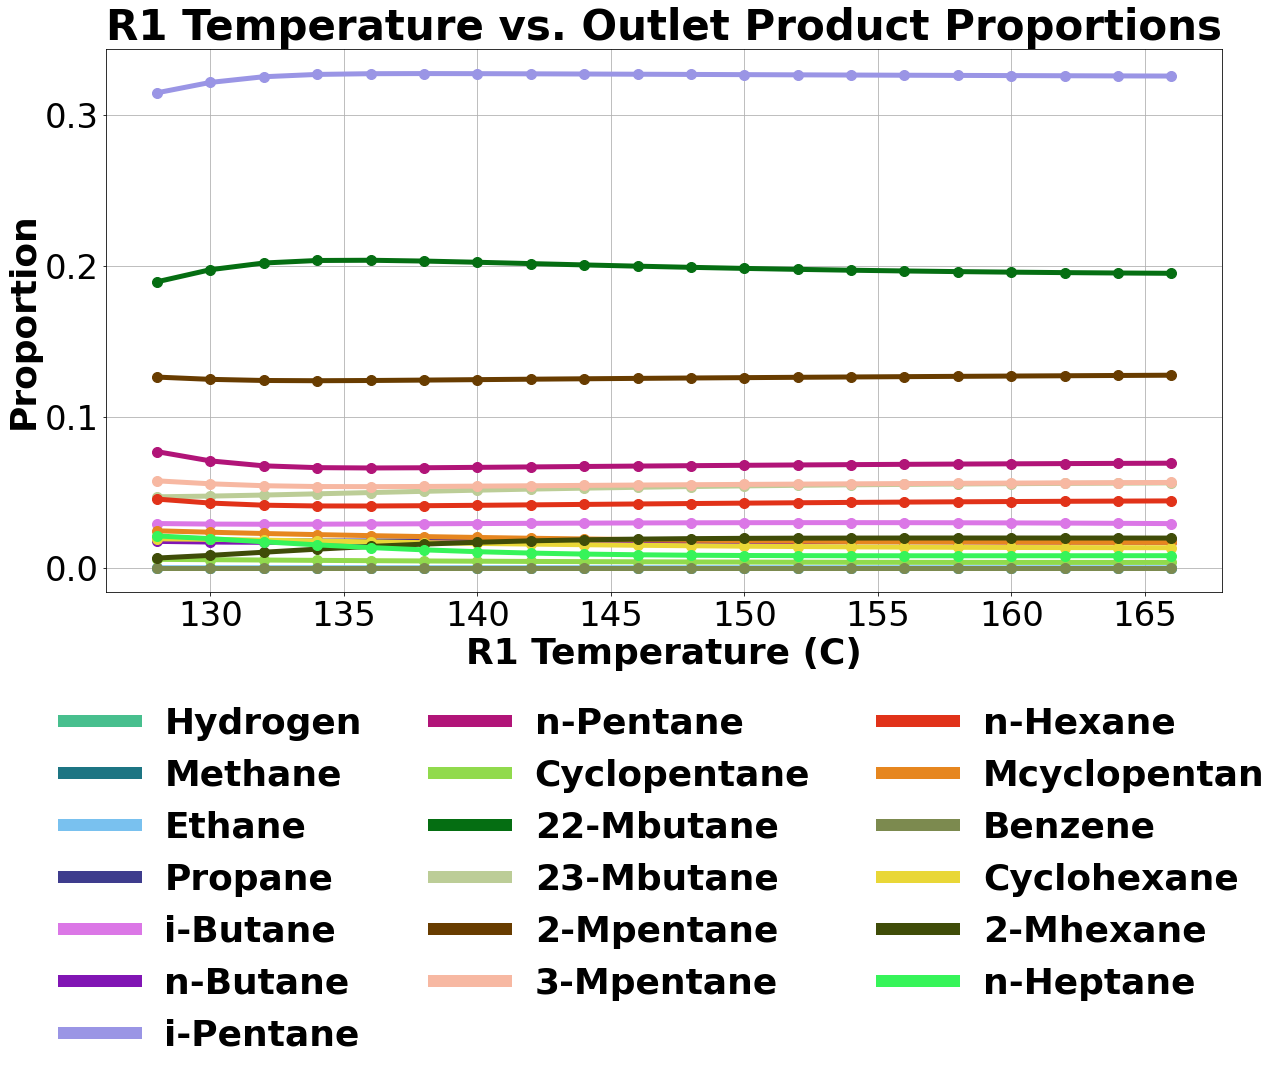

In [13]:
product_cols = [
"Hydrogen",
"Methane",
"Ethane",
"Propane",
"i-Butane",
"n-Butane",
"i-Pentane", 
"n-Pentane",
"Cyclopentane",
"22-Mbutane",
"23-Mbutane",
"2-Mpentane",
"3-Mpentane",
"n-Hexane",
"Mcyclopentan",
"Benzene",
"Cyclohexane",
"2-Mhexane",
"n-Heptane"]
product_colors = ["#48bf8e", "#1d7583", "#79c1ef", "#3e3c8d", "#db77e6", "#8115b4", "#9a95e5", "#b11478", 
                  "#91da4d", "#056e12", "#bccd97", "#683c00", "#f7b8a2", "#e13219", "#e6861f", "#7c8a4f", 
                  "#e9d737", "#3f4c08", "#36f459"]

R2_TEMPERATURE = 134
R1_PRESSURE = 50
R2_PRESSURE = 50

sweep_col = 'r1_temp'
sweep_col_title = 'R1 Temperature (C)'
ix = (dfe['r2_temp'] == R2_TEMPERATURE) & (dfe['r1_pressure'] == R1_PRESSURE) & (dfe['r2_pressure'] == R2_PRESSURE)
sdf = dfe[ix].copy()
sdf.sort_values([sweep_col], inplace=True)

f, ax = plt.subplots(1, 1, figsize=(20, 10))
for col, color in zip(product_cols, product_colors):
    ax.plot(sdf['r1_temp'], sdf['process_%s' % col], linewidth=5, marker='o', markersize=10, label=col, color=color)

ax.tick_params(axis='x', labelsize=34)
ax.tick_params(axis='y', labelsize=34)
ax.set_xlabel('R1 Temperature (C)', fontsize=36, fontweight='bold')
ax.set_ylabel('Proportion', fontsize=36, fontweight='bold')
ax.grid('both')
legend = ax.legend(loc='upper center', 
                  frameon=False,
                  bbox_to_anchor=(0.5, -.15),
                  fancybox=False, 
                  shadow=False,
                  ncol=3,
                  prop={'weight':'bold', 'size':36})
for line in legend.get_lines():
    line.set_linewidth(12.0)
ax.set_title('R1 Temperature vs. Outlet Product Proportions', fontsize=42, fontweight='bold')
plt.savefig("tmp/fig3.tiff", bbox_inches='tight', transparent=True, pad_inches=0, dpi=300, pil_kwargs={"compression": "tiff_lzw"})